# Key Driver Analysis
- toc: true 
- badges: true
- comments: true
- categories: [key-driver-analysis,driver-analysis,importance-analysis,relative-importance-analysis,johnson-relative-weights,shapley-regression]
- image: images/key_drivers.jpeg

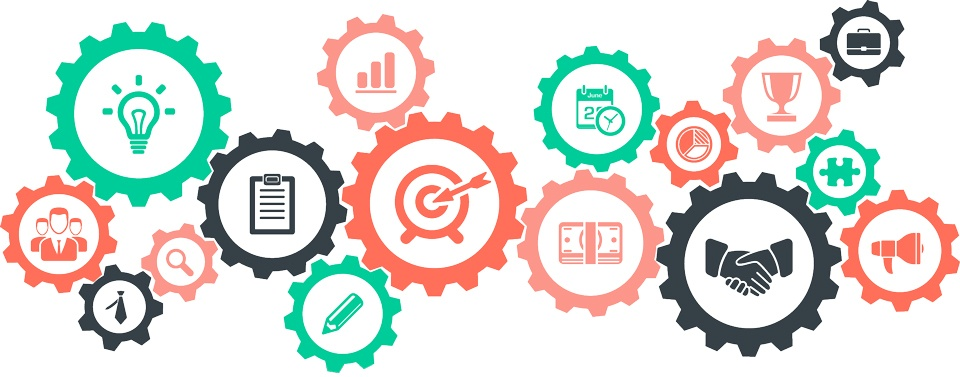

## What is Key Driver Analysis?

**Key Driver Analysis** is also known as **Importance Analysis** and **Relative Importance Analysis**. The goal of this analysis is to quantify the relative importance of each of the predictor variables in predicting the target variable. Each of the predictors is commonly referred to as a driver. 

Generally, the output of Key Driver Analysis is a table or chart showing the *Relative Importance* of the drivers (predictors). 

## How is it different from traditional predictive models?
In classic predictive models, the focus is on prediction, whereas with key driver analysis the main focus is on identifying the relative importance of the predictors (drivers). 

## What are the supported target types to perform Key Driver Analysis?
Key driver analysis can be performed on almost all types of target types that are binary, categorical, and numerical. 

## How to perform Key Driver Analysis?
Key driver analysis can be performed with any of the following techniques. 
1. **Correlations** - *appropriate when we're not concerned about multi-collinearity.*
2. **Jaccard coefficient/index** - *This is similar to correlation, except it is only appropriate when both the predictor and outcome variables are binary.*
3. **Generalized Linear Models (GLM)**
    * To conduct a valid key driver analysis we need to select an appropriate generalized linear model (GLM) which is consistent with our data. 
        * **Linear Regression** *- for continues target variable*
        * **Logistic Regression** *- for a binary target variable *
        * **Quasi Poisson Regression** *- for a decimal target variable *
        * **Ordered Logistic Regression** *- for a rating or ordered numerical target variable*
4. **Shapely Regression** - *This a regularized regression, designed for situations where linear regression results are unreliable due to high correlations between predictors.*
5. **Johnson Relative Weights** - *Similar to Shapley Regression, this is a regularized regression and it can be used for all types of target variables*

### Using Generalized Linear Models (GLMs)
In general when we build GLM's it's often observed that the coefficients are negative, however, in the case of key driver analysis this is an indication of a problem.
The causes could be:
1. The sign is wrong
    * The predictor variable is highly correlated with other predictors
    * The predictor is unimportant
2. The predictor variable encoded incorrectly


#### Downsides of using GLM's for Key Driver Analysis:
1. GLMs become highly unreliable when the predictors are highly correlated (multi-collinearity) and tend to pick up random patterns in the data, hence the possibility of incorrect signs.
2. GLMs implicitly assume that predictors are on the same scale. So, it become hard to compare the coefficients directly. The most popular way to solve this problem is to divide the each value of predictor by it's standard deviation (i.e., to normalize or standardize the variables) but it does not necessarily solve the problem.

The solution to the above 2 problems is to not use GLMs 😊, and to instead use models that are more reliable when there are high correlations and can handle feature that are on different scales, such as **Shapley regression** and **Johnson’s relative weights**. These techniques do not solve the problem of correlated predictors. Rather, they ensure that you get stable results in the presence of correlated predictors. At a conceptual level, the way they do this is by computing importance scores as a weighted average of predictors, where the weights are determined by the extent of intercorrelation between the predictors.

### Using Shapley regression or Johnson’s relative weights
As it's mentioned earlier, the traditional GLMs suffer from two practical challenges: sensitivity to high correlations between predictor variables, and, sensitivity to the scale of the predictor variables. Both problems can be addressed by using either Shapley regression or Johnson’s relative weights.

The underlying math of both Shapley regression and Johnson’s relative weight ensures that both techniques always report a positive importance score.

## Finally, which method is recommended to perform Key Driver Analysis?
Both Shapley regression and Johnson’s relative weights are designed to address the same two problems: correlations between predictor variables and predictor variables with different scales.

The underlying theory of the two methods are completely different. 
* Shapley regression is based on running lots of linear regressions with different subsets of predictor variables. 
* Johnson’s relative weights is an orthonormal rotation of the predictor variables.

Nevertheless, the two methods give essentially identical results, so there is no need to understand the intricacies of the two methods in order to choose one.
There are, however, two practical difference between the methods:
* **Shapley Regression** is only applicable for linear regression. 
* **Johnson’s Relative Weights** is applicable for any GLM.
* **Johnson’s Relative Weights** is much faster to compute than Shapley Regression.

**For these reasons, our preference is to always use Johnson’s Relative Weights 💪 for Key Driver Analysis**

> Important: Though the theoretical assumptions of **Johnson’s relative weights** and **Shapley regression** assumes a positive importance score. Sometimes we may see negative coefficients, which is a clear indication that key driver analysis is incorrect.

## References
* https://www.displayr.com/what-is-driver-analysis/
* https://www.displayr.com/the-problem-with-using-multiple-linear-regression-for-key-driver-analysis-a-case-study-of-the-cola-market/
* https://www.displayr.com/shapley-value-regression
* https://www.statisticshowto.com/relative-weights/
* https://www.displayr.com/reasons-to-use-relative-weights/
* https://measuringu.com/key-drivers/